In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/regression_train.csv')
test_df = pd.read_csv('./data/regression_test.csv')
concat_df = pd.concat([train_df, test_df])

### Analyse data

In [3]:
concat_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,174000
1,80,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,135500
2,160,FV,NaN,5105,Pave,NaN,IR2,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,148800
3,20,RL,50.0,9405,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,118000
4,50,RL,78.0,10496,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,1,2007,WD,Normal,143000


In [4]:
concat_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.895134,70.037500,10516.753941,6.098698,5.575737,1971.244688,1984.851953,103.75672,443.943797,46.581220,...,94.203564,46.548321,21.969157,3.411926,15.071282,2.760795,43.518849,6.321453,2007.815627,180873.849212
std,42.314997,24.291037,9984.686874,1.383270,1.113079,30.200333,20.645748,181.10815,456.106417,161.369977,...,125.371997,66.140461,61.137400,29.327247,55.775138,40.191018,496.291826,2.704495,1.328542,79449.133000
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,384.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
corr_matrix = concat_df.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
tuples_with_saleprice = [tup for tup in sol.keys() if 'SalePrice' in tup]

print(f"Best correlations with y: ")
sol[tuples_with_saleprice][:20]

Best correlations with y: 


OverallQual   SalePrice    0.790913
GrLivArea     SalePrice    0.708478
GarageCars    SalePrice    0.640189
GarageArea    SalePrice    0.623305
TotalBsmtSF   SalePrice    0.613784
1stFlrSF      SalePrice    0.606246
FullBath      SalePrice    0.560458
TotRmsAbvGrd  SalePrice    0.533377
YearBuilt     SalePrice    0.522590
YearRemodAdd  SalePrice    0.506816
GarageYrBlt   SalePrice    0.486046
MasVnrArea    SalePrice    0.478019
Fireplaces    SalePrice    0.466750
BsmtFinSF1    SalePrice    0.387226
LotFrontage   SalePrice    0.351529
WoodDeckSF    SalePrice    0.324238
2ndFlrSF      SalePrice    0.318814
OpenPorchSF   SalePrice    0.315125
HalfBath      SalePrice    0.283596
LotArea       SalePrice    0.263905
dtype: float64

### Preprocessing

### Handle null values

In [6]:
total_null_values = concat_df.isna().sum().sum()

print(f'Total null values: {total_null_values}')

Total null values: 6961


#### 1. Threshold for columns (if null values is over 50 % of column)

In [7]:
series = concat_df.isnull().sum()
series_filtered = series[series > 0]

total_rows = concat_df.shape[0]
threshold = 0.5
series_filtered_mask = (series_filtered / total_rows) > threshold

columns_to_remove = list(series_filtered[series_filtered_mask].keys())

concat_df.drop(columns_to_remove, inplace=True, axis=1)

print(f'Removed columns that has over 50 % null values : {columns_to_remove}')

Removed columns that has over 50 % null values : ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
total_null_values = concat_df.isna().sum().sum()

print(f'Total null values: {total_null_values}')

Total null values: 1558


#### 2. Threshold for rows (if row has over 10 missing values)

In [9]:
null_mask =  ~(concat_df.isnull().sum(axis=1) > 10)
filtered_df = concat_df[null_mask]

print(f'removed {concat_df.shape[0] - filtered_df.shape[0]} rows')

removed 6 rows


In [10]:
total_null_values = filtered_df.isna().sum().sum()

print(f'Total null values: {total_null_values}')

Total null values: 1492


#### 3. Fill empty strings with syntethic data through most frequent class

In [11]:
filtered_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [12]:
mask = filtered_df.dtypes == 'O'
columns_to_string = filtered_df.select_dtypes('O')

for column in columns_to_string:
    most_frequent = filtered_df[column].value_counts().keys()[0]
    filtered_df[column] = filtered_df[column].fillna(most_frequent).copy()

In [13]:
total_null_values = filtered_df.isna().sum().sum()

print(f'Total null values: {total_null_values}')

Total null values: 342


#### 4. Fill empty floats with syntetic data through mean of the class

##### We could also remove classes, but we wanted to try to keep so much data as possible. We will try inference without these classes for comparison. 

In [14]:
mask = filtered_df.isnull().sum() > 0
columns = filtered_df.columns[mask]
columns_to_fix = filtered_df[columns]

for column in columns_to_fix:
    mean = columns_to_fix[column].mean()
    filtered_df[column] = columns_to_fix[column].replace(np.NAN, mean)
    
print(f'Doing syntetic data on : {list(columns)}')

Doing syntetic data on : ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [15]:
total_null_values = filtered_df.isna().sum().sum()

print(f'Total null values: {total_null_values}')

Total null values: 0


#### Analyse data through correlations

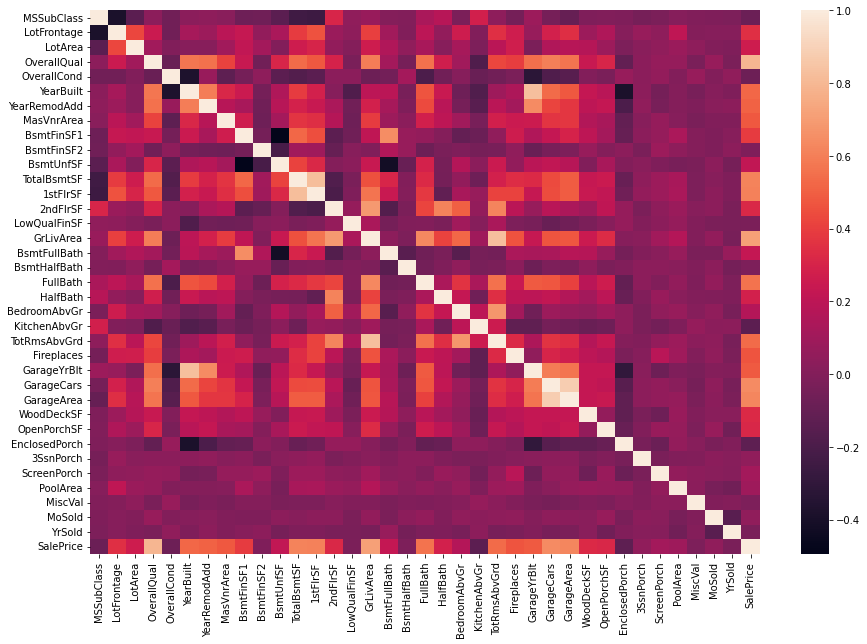

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(concat_df.corr())
plt.show()

### Removing the feature with highest correlation

In [17]:
correlations = concat_df.corr().abs()
correlations = correlations[correlations != 1]
correlations.unstack().sort_values(ascending=False)[:10]

GarageCars    GarageArea      0.882268
GarageArea    GarageCars      0.882268
GarageYrBlt   YearBuilt       0.825519
YearBuilt     GarageYrBlt     0.825519
TotRmsAbvGrd  GrLivArea       0.825468
GrLivArea     TotRmsAbvGrd    0.825468
TotalBsmtSF   1stFlrSF        0.819549
1stFlrSF      TotalBsmtSF     0.819549
OverallQual   SalePrice       0.790913
SalePrice     OverallQual     0.790913
dtype: float64

In [18]:
filtered_df.drop('GarageCars', axis=1, inplace=True)

### One-hot encoding

In [19]:
mask = filtered_df.dtypes == 'O'
string_datatype_df = filtered_df.select_dtypes('O')

for col_name in string_datatype_df:
    one_hot_df = pd.get_dummies(string_datatype_df[col_name])
    filtered_df = pd.concat([filtered_df, one_hot_df], axis=1).drop(col_name, axis=1)

In [20]:
filtered_df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [21]:
print("Example of one-hot encoding: ")

one_hot_df.head()

Example of one-hot encoding: 


,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


### Finished preprocessing

In [22]:
filtered_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60,65.000000,8125,6,5,1994,1995,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,80,75.000000,9750,5,5,1967,1967,0.0,400,480,...,0,0,0,1,0,0,0,0,1,0
2,160,70.077889,5105,7,5,2004,2004,0.0,239,0,...,0,0,0,1,0,0,0,0,1,0
3,20,50.000000,9405,5,9,1947,2008,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,50,78.000000,10496,6,6,1949,1950,320.0,196,0,...,0,0,0,1,0,0,0,0,1,0


### Saving preprocessed df for VG assignment

In [23]:
filtered_df.to_csv('./data/regression_cleaned.csv', index=False)

### Using Random forest model for regression

In [24]:
y = filtered_df['SalePrice']
X = filtered_df.drop('SalePrice', axis=1)

#### Splitting data into train and test data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
64,50,79.000000,9492,5,5,1941,1950,0.0,368,41,...,0,0,0,1,0,0,0,0,1,0
145,60,85.000000,10574,8,5,2005,2006,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
794,60,70.000000,8400,8,6,2001,2001,0.0,643,0,...,0,0,0,1,0,0,0,0,1,0
725,20,80.000000,9920,5,5,1954,1954,110.0,354,290,...,0,0,0,1,0,0,0,0,1,0
374,120,70.077889,4500,6,5,1999,1999,425.0,883,0,...,0,0,0,1,0,0,0,0,1,0


#### Training model


##### Note that we do not test different hyperparameters at g stage

In [27]:
forest = RandomForestRegressor(n_estimators=20, max_depth=10, criterion="mse")
forest.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=10, n_estimators=20)

### Inference

In [28]:
prediction = forest.predict(X_test)
score = mean_squared_error(y_test, prediction)
deviations = abs(y_test - prediction)

print(f'Total mse: {score}\n')
print("Results through difference between mse of individual inferences:\n")
print(f'Worst result: {np.max(deviations)}')
print(f'Best result: {np.min(deviations)}')
print(f'Mean deviation: {np.mean(deviations)}')

Total mse: 1068528246.4621643

Results through difference between mse of individual inferences:

Worst result: 184684.7025
Best result: 35.00246681495628
Mean deviation: 19424.837720026357


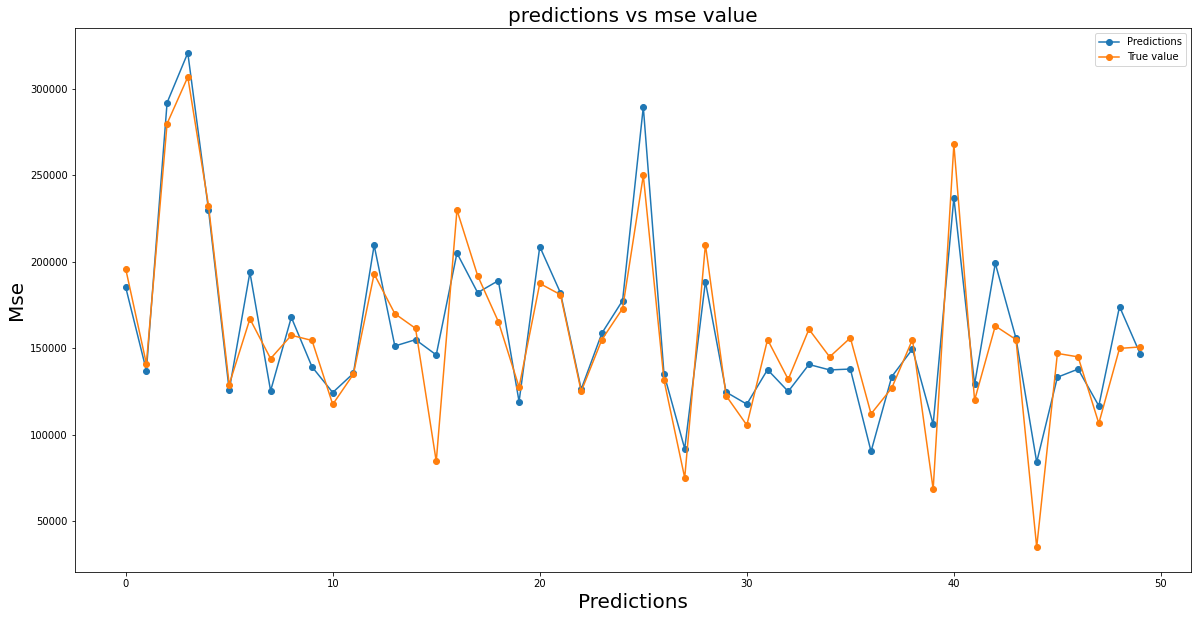

Through 50 examples used for this graph, we can see that predictions often follows true value closely.


In [29]:
figure = plt.figure(figsize=(20, 10))
length = len(prediction[:50])
plt.title('predictions vs mse value', fontsize=20)
plt.plot(range(length), prediction[:50], marker='o')
plt.plot(range(length), y_test[:50], marker='o')
plt.xlabel("Predictions", fontsize=20)
plt.ylabel('Mse', fontsize=20)
plt.legend(['Predictions', 'True value'])
plt.show()

print("Through 50 examples used for this graph, we can see that predictions often follows true value closely.")

#### Small experiment inference without  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] as we used syntetic data on them

In [30]:
X_experiment = X.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)

forest = RandomForestRegressor(n_estimators=20, max_depth=10, criterion="mse")
forest.fit(X_train, y_train)

prediction = forest.predict(X_test)
score_experiment = mean_squared_error(y_test, prediction)

diff_between_scores = score - score_experiment

print(f'Total mse first inference: {score}\n')
print(f'Total mse experiment inference: {score_experiment}\n')
print(f'Last inference - experiment shows: {diff_between_scores}')

Total mse first inference: 1068528246.4621643

Total mse experiment inference: 951372935.5783836

Last inference - experiment shows: 117155310.88378072
